In [21]:
from skimage import io
from PIL import Image

# next two lines are a kludge to import coastcam_funcs from the parent dir
import glob, sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from coastcam_funcs import *

# make a list of image files in the data sub-folder
rdir = '../data/'
flist = []
for impath in glob.glob(rdir+'*.jpg'):
    print( impath )
    flist.append( impath )

nfiles = len(flist)
print('Found {} files.'.format(nfiles))

../data\1581508801.c1.timex.jpg
../data\1581508801.c2.timex.jpg
../data\1612540801.c1.timex.jpg
../data\1615401000.c1.snap.jpg
../data\1615401000.c2.snap.jpg
../data\1618603200.c2.timex.jpg
../data\1618657200.c2.timex.jpg
Found 7 files.


In [19]:
# See if it matters which method is used to load
img = Image.open( impath )
print('Loaded with PIL Image.open:', type(img) )
img2 = io.imread( impath )
print('Loaded with skimage io.imread:', type(img2) )

sharp, contrast = estimate_sharpness( img )
print(sharp, contrast)
sharp, contrast = estimate_sharpness( img2 )
print(sharp, contrast)

Loaded with PIL Image.open: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Loaded with skimage io.imread: <class 'numpy.ndarray'>
0.0001231938473619685 0.046668412760335606
0.0001231938473619685 0.046668412760335606


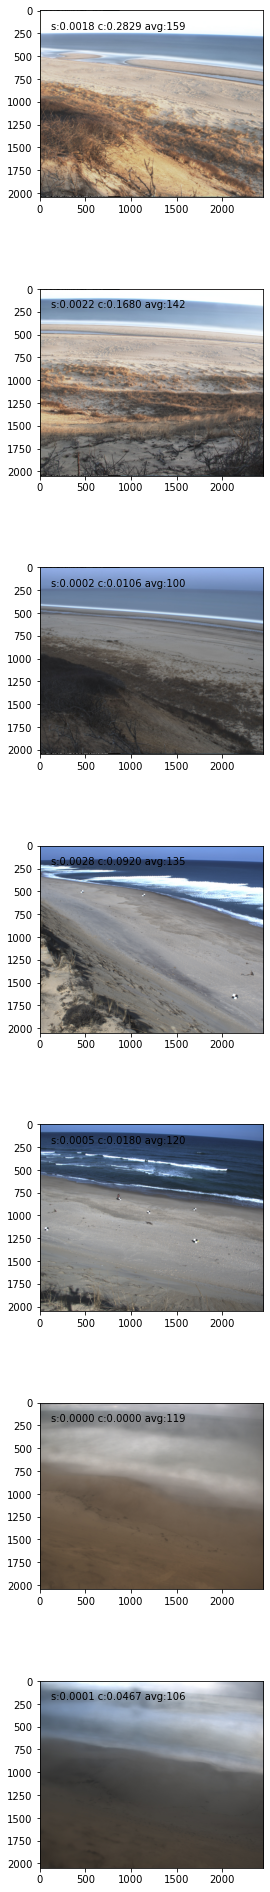

In [34]:
# arrays to store results
sharp = np.nan*np.ones(nfiles)
contrast = np.nan*np.ones(nfiles)
avg = np.nan*np.ones(nfiles)
rgb = np.nan*np.ones((nfiles,3))

fig, ax = plt.subplots(nfiles,1, figsize=(4,nfiles*5))
for i, impath in enumerate( glob.glob(rdir+'*.jpg') ):
    with Image.open( impath ) as img:
        sharp[i], contrast[i] = estimate_sharpness( img )
        rgb[i,:], avg[i] = average_color( img )
        ts = 's:{:.4f} c:{:.4f} avg:{:.0f}'.format(sharp[i],contrast[i],avg[i])
        ax[i].imshow(img)
        ax[i].text(.05,.9,ts,transform=ax[i].transAxes)